# Downloading Underwater Object Detection Dataset from kagglehub

In [2]:
import kagglehub
path = kagglehub.dataset_download("slavkoprytula/aquarium-data-cots")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'aquarium-data-cots' dataset.
Path to dataset files: /kaggle/input/aquarium-data-cots


# Load the YOLOv8n pretrained model for object detection

In [4]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")

# Start training YOLOv8n on the Underwater Object Detection Dataset for 88 epochs

In [5]:
!yolo detect train \
data="/root/.cache/kagglehub/datasets/slavkoprytula/aquarium-data-cots/versions/1/aquarium_pretrain/data.yaml" \
model=yolov8n.pt \
epochs=88 \
name="train2"

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/root/.cache/kagglehub/datasets/slavkoprytula/aquarium-data-cots/versions/1/aquarium_pretrain/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=88, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train23, nbs=64, nms=False, opset=None, optimize=False, optimiz

# Validate YOLO model

In [17]:
from ultralytics import YOLO
model.val()

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2419.0±427.9 MB/s, size: 105.4 KB)
val: Scanning /root/.cache/kagglehub/datasets/slavkoprytula/aquarium-data-cots/versions/1/aquarium_pretrain/valid/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 127/127 242.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 2.1it/s 3.7s
                   all        127        909      0.776      0.717      0.763      0.467
                  fish         63        459      0.864      0.712      0.794      0.454
             jellyfish          9        155      0.855      0.873       0.91      0.516
               penguin         17        104      0.712       0.74      0.722       0.33
                puffin         15         74      0.671      

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7958bc142a80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

# Load trained YOLO model for inference

In [18]:
infr_model = YOLO("/content/runs/detect/train23/weights/best.pt")

# Run inference on test images and display first 3 results


image 1/63 /root/.cache/kagglehub/datasets/slavkoprytula/aquarium-data-cots/versions/1/aquarium_pretrain/test/images/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg: 640x480 1 puffin, 6.6ms
image 2/63 /root/.cache/kagglehub/datasets/slavkoprytula/aquarium-data-cots/versions/1/aquarium_pretrain/test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg: 640x480 24 penguins, 5.9ms
image 3/63 /root/.cache/kagglehub/datasets/slavkoprytula/aquarium-data-cots/versions/1/aquarium_pretrain/test/images/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg: 640x480 7 penguins, 6.1ms
image 4/63 /root/.cache/kagglehub/datasets/slavkoprytula/aquarium-data-cots/versions/1/aquarium_pretrain/test/images/IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg: 640x480 1 penguin, 6.0ms
image 5/63 /root/.cache/kagglehub/datasets/slavkoprytula/aquarium-data-cots/versions/1/aquarium_pretrain/test/images/IMG_2354_jpeg_jpg.rf.396e872c7fb0a95e911806986995ee7a.jpg: 640x480 4 penguin

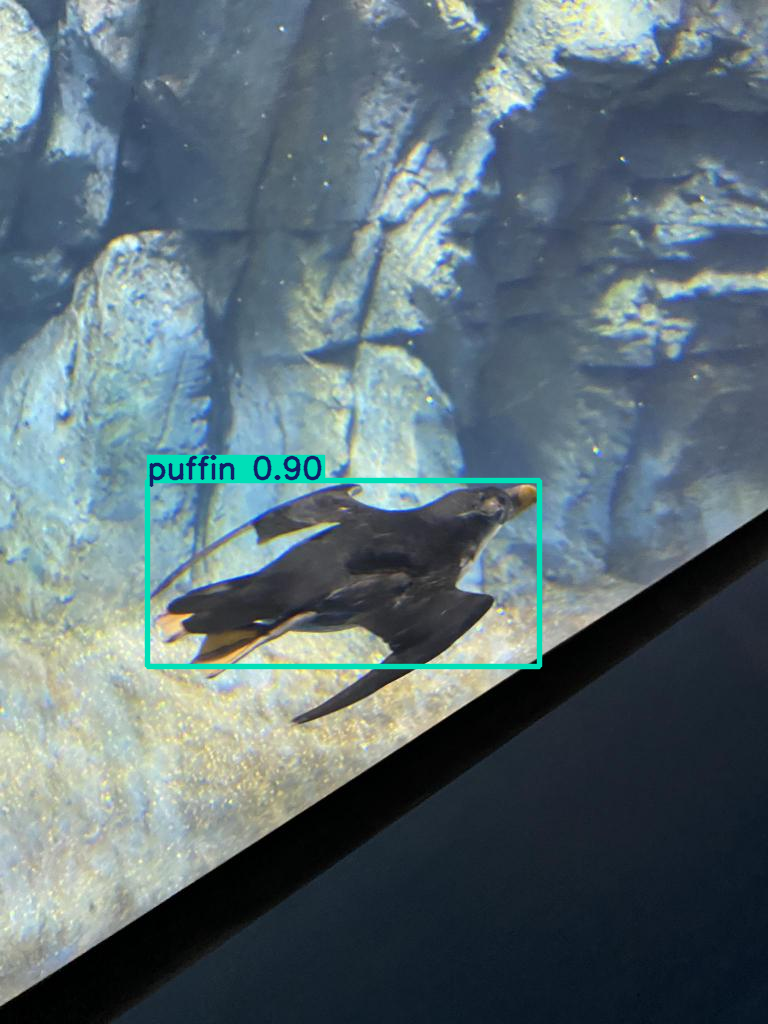

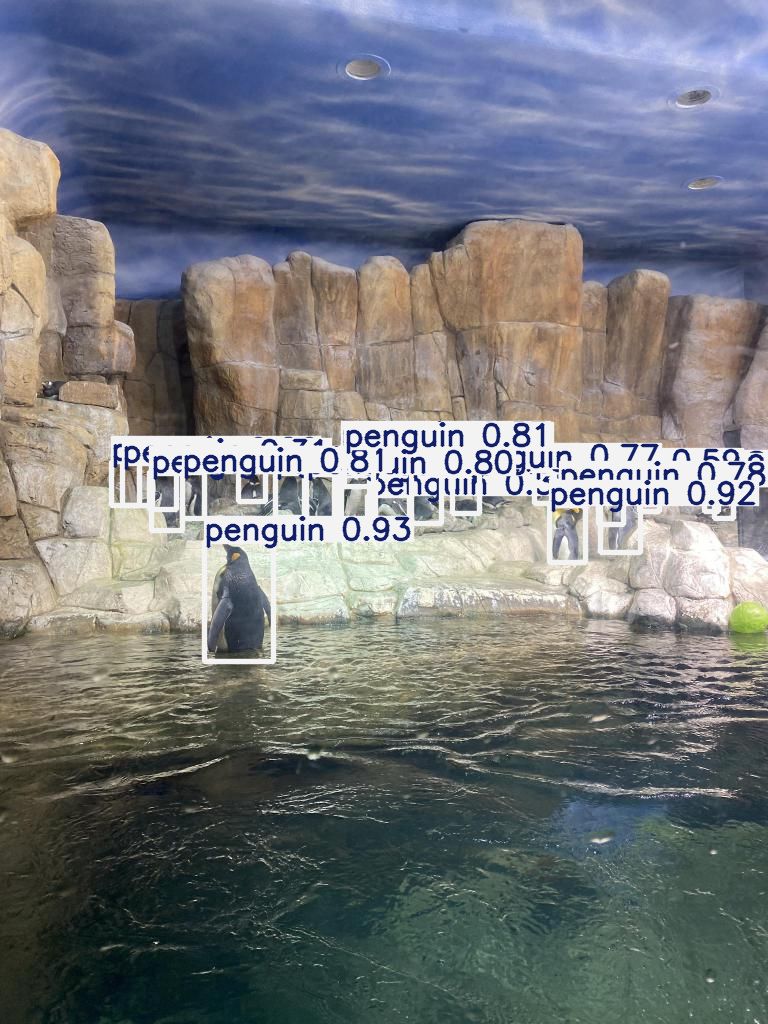

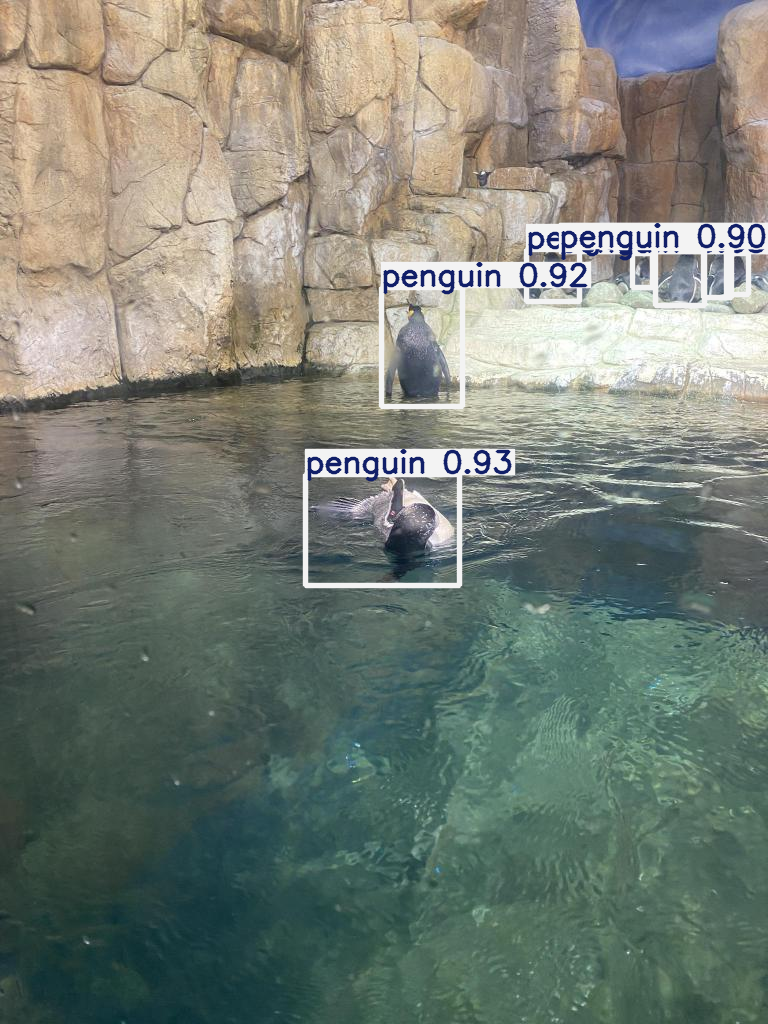

In [19]:
results = infr_model("/root/.cache/kagglehub/datasets/slavkoprytula/aquarium-data-cots/versions/1/aquarium_pretrain/test/images")
for i, result in enumerate(results[:3], 1):
    result.show()

# Display training detection results image

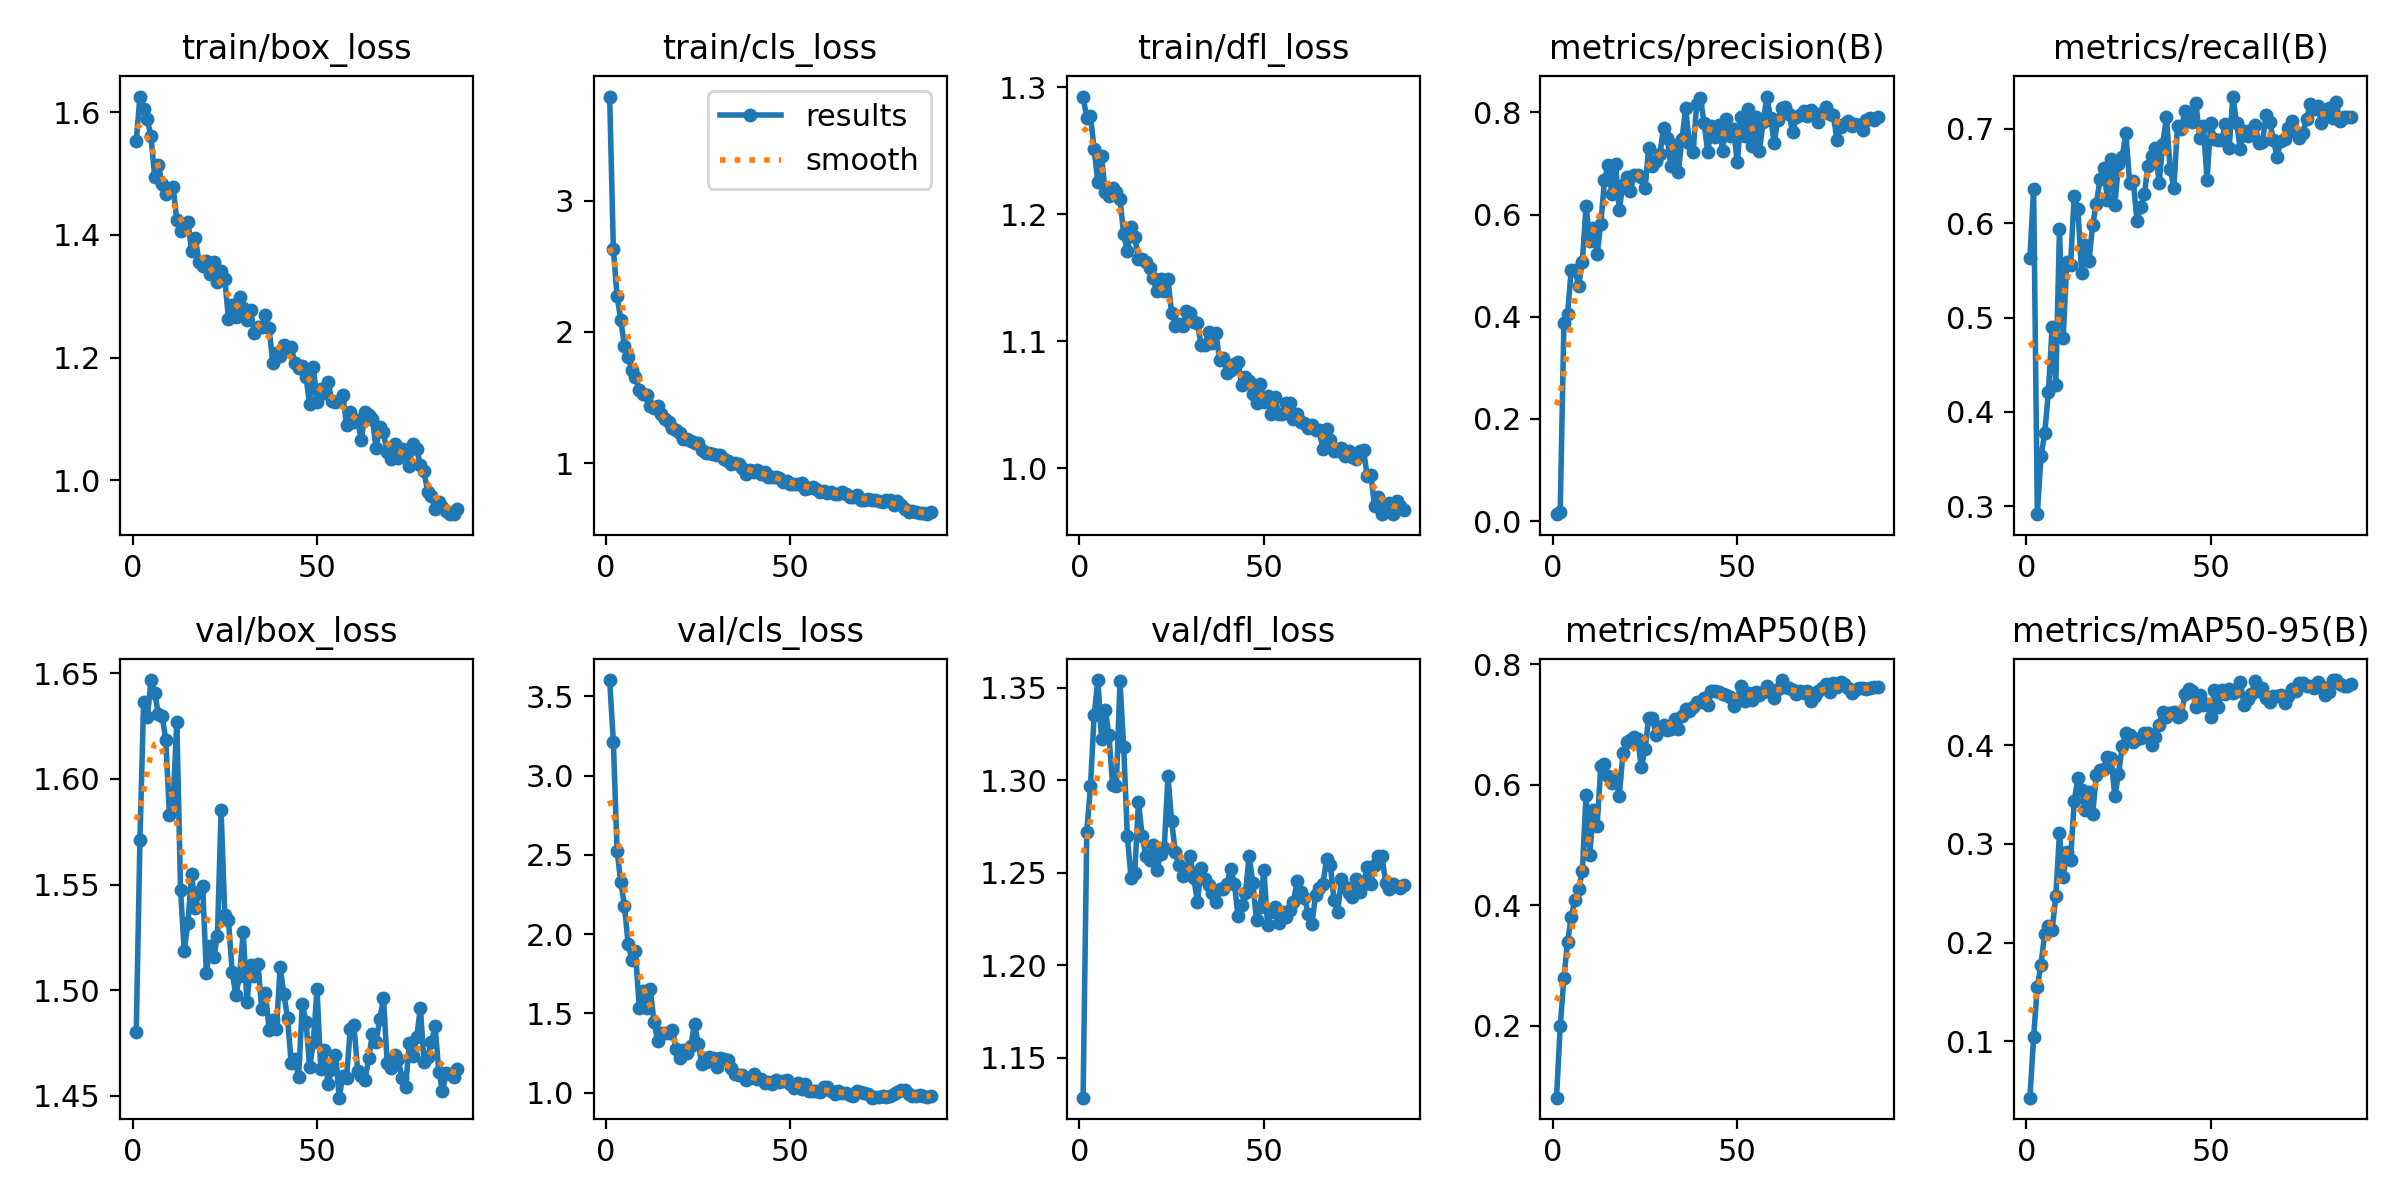

In [21]:
from IPython.display import Image

Image(filename='/content/runs/detect/train23/results.png')

# Upload images, convert .jfif to .jpg if needed, and run inference with visualization

Saving stingray-swimming-1200-wide.jpg to stingray-swimming-1200-wide.jpg

image 1/1 /content/stingray-swimming-1200-wide.jpg: 384x640 1 fish, 1 stingray, 8.5ms
Speed: 2.7ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


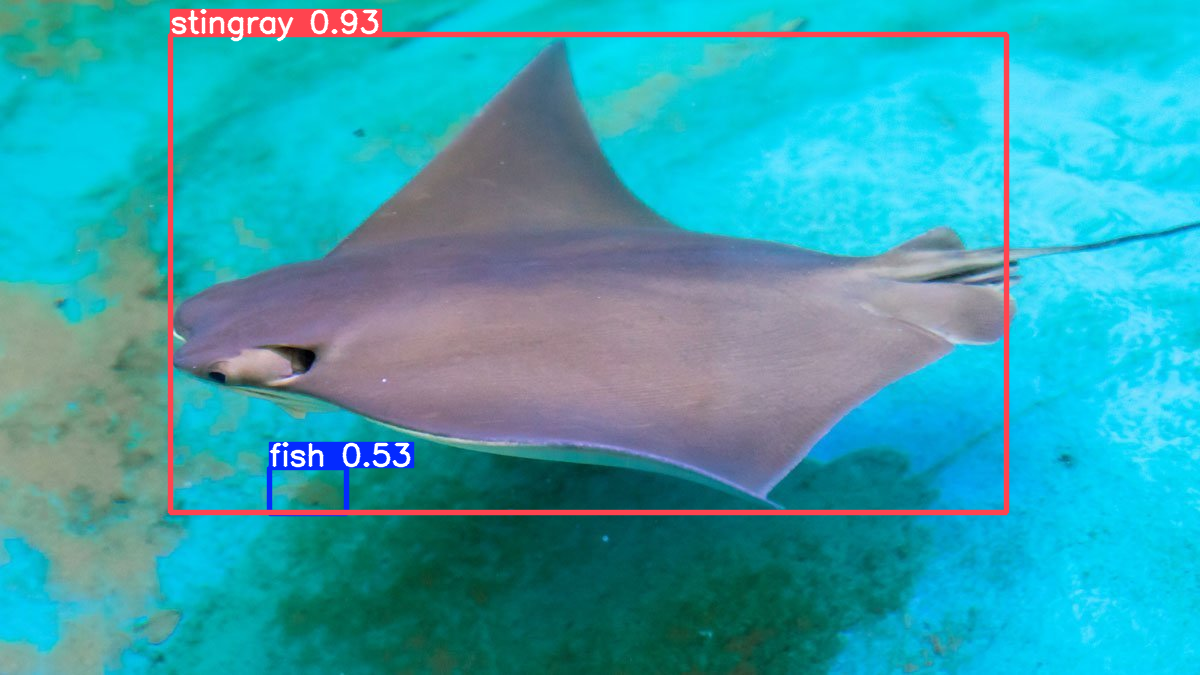

In [32]:
from google.colab import files
from PIL import Image
import os

uploaded = files.upload()

for filename in uploaded.keys():
    if filename.endswith('.jfif'):
        image = Image.open(filename)
        new_filename = filename.replace('.jfif', '.jpg')
        image.save(new_filename, 'JPEG')
        filename = new_filename

    results = infr_model(filename)
    results[0].show()
